#*Students Performance EDA*

In [1]:
#Goal: Understand if there is any relationship between the variables of the dataset

In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
#Seaborn is a Python data visualization library based on matplotlib
# NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.



In [3]:
#Loading the dataset
dataset = pd.read_csv("StudentsPerformance.csv")

#*Understanding the Dataset by using pd funtions*

In [4]:
#Use pd.head() and pd.tail() to check a few rows of data
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataset.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
#pd.info() this method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#check the columns name using pd.columns()
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
#the function dtypes it shows the data types in the data set.
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
#use pd.describe() to  returns description of the data in the DataFrame
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#use pd.shape to return the size of the dataframe
dataset.shape

(1000, 8)

In [11]:
#returning the unique values of each column
pd.unique(dataset['gender'])
pd.unique(dataset['race/ethnicity'])
pd.unique(dataset['parental level of education'])
pd.unique(dataset['lunch'])
pd.unique(dataset['test preparation course'])
pd.unique(dataset['parental level of education'])

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
#value_counts() show count the selected column
dataset['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [13]:
#check for missing values by using isnull funtion and summarize by using aggregate sum funtion
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
#We did not find missing or null values on the dataset. So we are going to add some new columns to the dataset

#Adding new columns

In [15]:
#Adding total score column by the sum of 3 previous score
dataset['total score'] = dataset['math score']+dataset['reading score']+dataset['writing score']

In [16]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [17]:
#let's add a categorical columnn based on the math score. If the math score is under 60 then we're going to return "Not Approveed" else "Approved"
dataset['Math Status'] = np.where(dataset['math score']< 60, 'Not Approved', 'Approveed')

In [18]:
#Print the first 5 rows of the dataset
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Math Status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Approveed
1,female,group C,some college,standard,completed,69,90,88,247,Approveed
2,female,group B,master's degree,standard,none,90,95,93,278,Approveed
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Not Approved
4,male,group C,some college,standard,none,76,78,75,229,Approveed


#Adding Visuals

<AxesSubplot:xlabel='math score', ylabel='Count'>

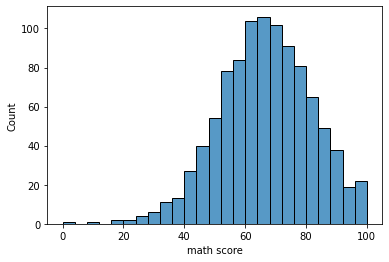

In [19]:
#The first visual we are going to use it's a histogram to see the frecuency of the data based on the math score column
#Using seaborn library
sns.histplot(data=dataset, x="math score")

In [20]:
#Visualizing a correlation between variables
corr=dataset.corr()
corr

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


<AxesSubplot:>

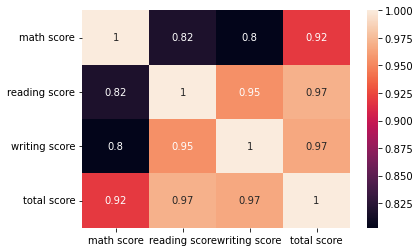

In [21]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

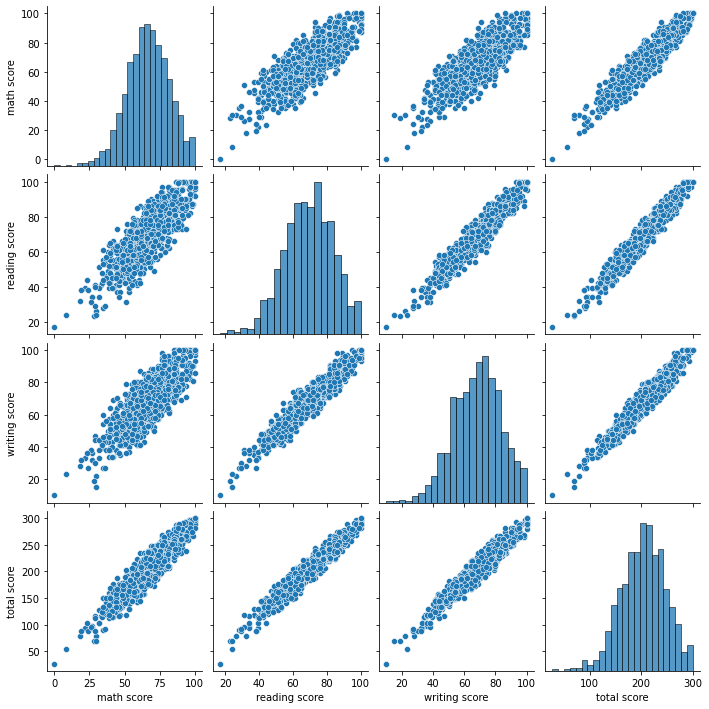

In [22]:
sns.pairplot(dataset)
plt.show()

<AxesSubplot:xlabel='Math Status', ylabel='Count'>

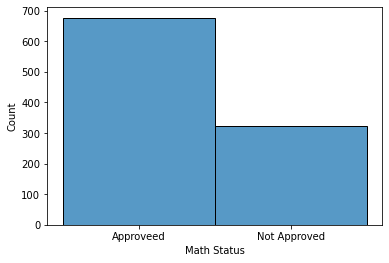

In [23]:
#Based on math status
sns.histplot(data=dataset, x="Math Status", legend=True)

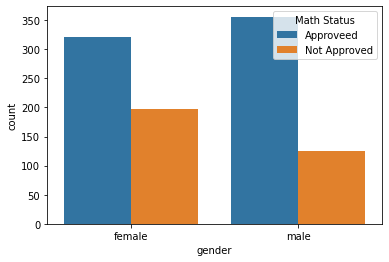

In [24]:
#Exploring math status by gender
plot = sns.countplot(x='gender', data = dataset, hue='Math Status')
_ = plt.setp(plot.get_xticklabels(), rotation='horizontal') 

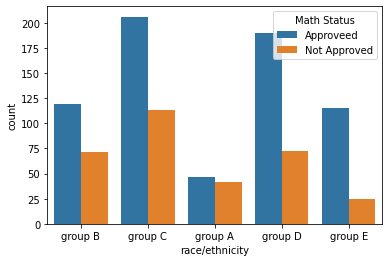

In [25]:
#Exploring the race / ethnicity column
plot = sns.countplot(x='race/ethnicity', data = dataset, hue='Math Status')
_ = plt.setp(plot.get_xticklabels(), rotation='horizontal')

<Figure size 864x504 with 0 Axes>

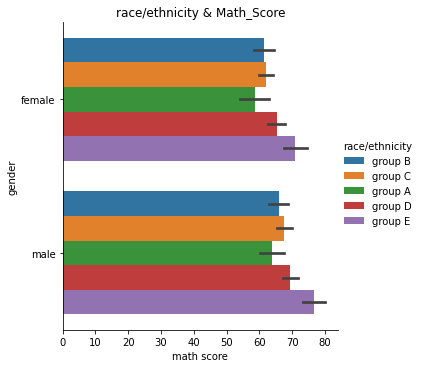

In [26]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender", x="math score",
                 hue="race/ethnicity",
                 data=dataset, kind="bar")
plt.title('race/ethnicity & Math_Score')
plt.show()

<Figure size 720x720 with 0 Axes>

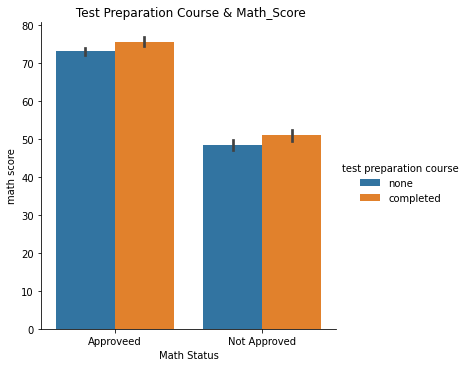

In [27]:
plt.figure(figsize=(10,10))
sns.catplot(x="Math Status", y="math score",
                 hue="test preparation course",
                 data=dataset, kind="bar")
plt.title(' Test Preparation Course & Math_Score')
plt.show()

In [28]:
#students with test prep course has more probabilities to aprrove in math

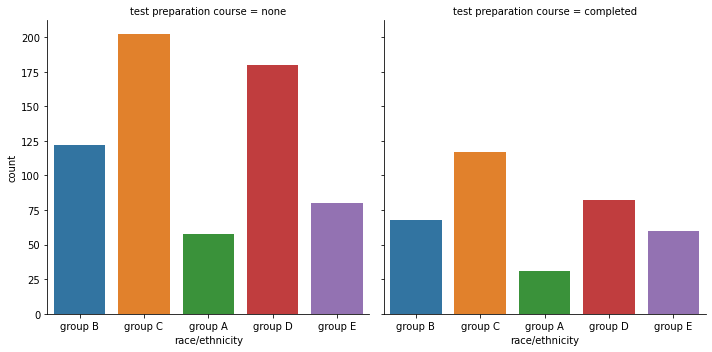

In [29]:
sns.catplot(x="race/ethnicity", col="test preparation course",
                data=dataset,
                kind="count")

In [45]:
#Multi variable linear regresion using sklearn linear_model
Xdataset = dataset.drop(columns=['race/ethnicity','parental level of education','reading score','writing score','total score','Math Status'])
        

MLdataset = pd.get_dummies(data=Xdataset, drop_first=True)
MLdataset=MLdataset[['gender_male','lunch_standard','test preparation course_none','math score']]
MLdataset

#Using dummy data categorical values become T/F values

,gender_male,lunch_standard,test preparation course_none,math score
0,0,1,1,72
1,0,1,0,69
2,0,1,1,90
3,1,0,1,47
4,1,1,1,76
...,...,...,...,...
995,0,1,0,88
996,1,0,1,62
997,0,0,0,59
998,0,1,0,68


In [46]:
X = MLdataset[['gender_male','lunch_standard','test preparation course_none']]
y = MLdataset['math score']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the Math Score by using dummy data
predictedScore = regr.predict([[1,1,0]])

print(predictedScore)

[76.24332085]
